In [ ]:
!pip3 install keras

In [ ]:
!pip3 install PIL

In [ ]:
!pip3 install Pillow

In [ ]:
!pip3 install keras.preprocessing.image

In [ ]:
!pip3 install tensorflow

In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt
import cv2
from scipy.misc import imresize
from scipy.misc import imread
from keras.preprocessing import image
from keras.preprocessing import image

/home/akshay/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
!pwd
!ls


In [2]:
#PATH = os.path.abspath(os.path.join('..', 'input'))
#SOURCE_IMAGES001 = os.path.join(PATH, "images_001", "images")
images001 = glob(os.path.join("/home/akshay/Documents/images_001/images/", "*.png"))
print(images001[0:10],"\n")
print(len(images001))

['/home/akshay/Documents/images_001/images/00000586_000.png', '/home/akshay/Documents/images_001/images/00000372_013.png', '/home/akshay/Documents/images_001/images/00000927_004.png', '/home/akshay/Documents/images_001/images/00000132_006.png', '/home/akshay/Documents/images_001/images/00001170_032.png', '/home/akshay/Documents/images_001/images/00000870_000.png', '/home/akshay/Documents/images_001/images/00001094_002.png', '/home/akshay/Documents/images_001/images/00000963_009.png', '/home/akshay/Documents/images_001/images/00000894_004.png', '/home/akshay/Documents/images_001/images/00001277_000.png'] 

4999


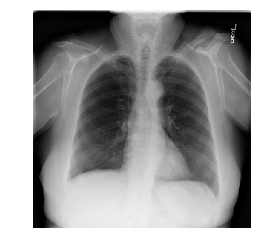

In [3]:
%matplotlib inline
image_name = "/home/akshay/Documents/images_001/images/00000586_000.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

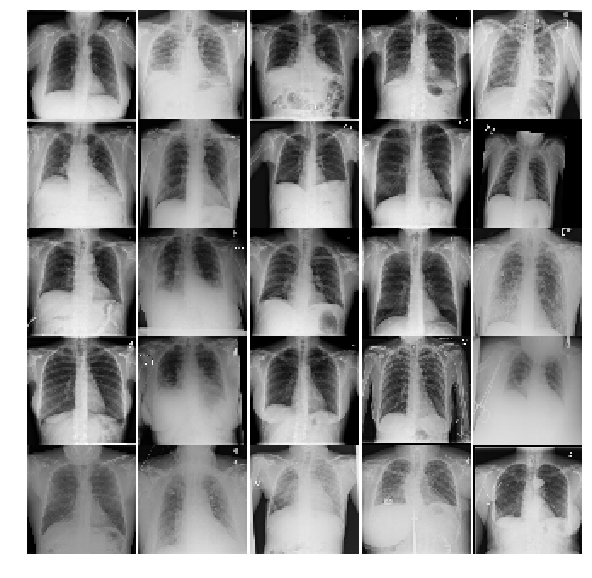

In [4]:
# Plot Multiple Images
xrays = glob('/home/akshay/Documents/images_001/images/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in xrays[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (64, 64)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1



In [5]:
labels = pd.read_csv('/home/akshay/Documents/Data_Entry_2017.csv')
labels.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143
5,00000003_001.png,Hernia,1,3,074Y,F,PA,2500,2048,0.168,0.168
6,00000003_002.png,Hernia,2,3,075Y,F,PA,2048,2500,0.168,0.168
7,00000003_003.png,Hernia|Infiltration,3,3,076Y,F,PA,2698,2991,0.143,0.143
8,00000003_004.png,Hernia,4,3,077Y,F,PA,2500,2048,0.168,0.168
9,00000003_005.png,Hernia,5,3,078Y,F,PA,2686,2991,0.143,0.143


In [6]:
df=pd.DataFrame(labels)
df.describe()

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,3827.000000,4715.000000,0.198800,0.198800


In [7]:
df.isnull().sum()

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImageWidth             0
OriginalImageHeight            0
OriginalImagePixelSpacing_x    0
OriginalImagePixelSpacing_y    0
dtype: int64

In [8]:
def proc_images(folder):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    NoFinding = "No Finding"
    Consolidation="Consolidation"
    Infiltration="Infiltration"
    Pneumothorax="Pneumothorax"
    Edema="Edema"
    Emphysema="Emphysema"
    Fibrosis="Fibrosis"
    Effusion="Effusion"
    Pneumonia="Pneumonia"
    Pleural_Thickening="Pleural_Thickening"
    Cardiomegaly="Cardiomegaly"
    NoduleMass="Nodule"
    Hernia="Hernia"
    Atelectasis="Atelectasis"
    RareClass=["Emphysema","Edema","Fibrosis","Pneumonia","Hernia"]
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 64
    HEIGHT = 64

    for img in folder:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]

        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

        # Labels
        if NoFinding in finding:
            finding = 0
            y.append(finding)        
        elif Consolidation in finding:
            finding = 1
            y.append(finding)    
        elif Infiltration in finding:
            finding = 2
            y.append(finding)           
        elif Pneumothorax in finding:
            finding = 3
            y.append(finding)
        elif Edema in finding:
            finding = 9##
            y.append(finding)
        elif Emphysema in finding:
            finding = 9##
            y.append(finding)
        elif Fibrosis in finding:
            finding = 9##
            y.append(finding) 
        elif Effusion in finding:
            finding = 4
            y.append(finding)             
        elif Pneumonia in finding:
            finding = 9##
            y.append(finding)   
        elif Pleural_Thickening in finding:
            finding = 5
            y.append(finding) 
        elif Cardiomegaly in finding:
            finding = 6
            y.append(finding) 
        elif NoduleMass in finding:
            finding = 7
            y.append(finding) 
        elif Hernia in finding:
            finding = 9##
            y.append(finding) 
        elif Atelectasis in finding:
            finding = 8
            y.append(finding) 
        else:
            finding = 9
            y.append(finding)

    return x,y
# use for loop and dictionary

In [9]:
X001,y001 = proc_images(images001[:500])
df001 = pd.DataFrame()
df001["images"]=X001
df001["labels"]=y001
print(len(df001), df001.images[0].shape)


500 (64, 64, 3)


In [10]:
len(df001["labels"])
df001['images'][0]
df001['images']=np.array(df001['images'])
df001['labels']=np.array(df001['labels'])


In [11]:
from sklearn import linear_model,metrics
lm1=linear_model.LogisticRegression()

In [12]:
X001,y001 = proc_images(images001[2000:2100])
te001 = pd.DataFrame()
te001["images"]=X001
te001["labels"]=y001
te001['images']=np.array(te001['images'])
te001['labels']=np.array(te001['labels'])


#print(len(df001), df001.images[0].shape)


In [13]:
X_tr=[]
X_train=df001.images
for i in range(len(df001.images)):

    temp_img=X_train[i]

    temp_img=image.img_to_array(temp_img)

    X_tr.append(temp_img)

#converting train images to array and applying mean subtraction processing

X_tr=np.array(X_tr)
#train_img=preprocess_input(train_img)
# applying the same procedure with the test dataset

In [14]:
X_te=[]
X_test=te001.images
for i in range(len(te001.images)):

    temp_img=X_test[i]

    temp_img=image.img_to_array(temp_img)

    X_te.append(temp_img)

X_te=np.array(X_te) 

In [15]:
print(X_tr.shape,X_te.shape)

(500, 64, 64, 3) (100, 64, 64, 3)


In [16]:
X_tr=X_tr.reshape((X_tr.shape[0],X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))


In [17]:
X_te=X_te.reshape((X_te.shape[0],X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))

In [18]:
print(X_tr.shape,X_te.shape)

(500, 12288) (100, 12288)


In [ ]:
lm1.fit(X_tr,df001['labels'])
pred=lm1.predict(X_te)
print(pred)
print("Accuracy",metrics.accuracy_score(pred,te001['labels']))

In [ ]:
import xgboost as xgb

In [ ]:
xclas = xgb.XGBClassifier() 
xclas.fit(X_tr, df001['labels'])
pred=xclas.predict(X_te)
print("Accuracy",metrics.accuracy_score(pred,te001['labels']))

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_tr,df001['labels'])
pred=clf.predict(X_te)
print("Accuracy",metrics.accuracy_score(pred,te001['labels']))

In [19]:
def frange(start, stop, step):
     i = start
     while i < stop:
         yield i
         i += step


In [ ]:
from sklearn import svm, grid_search, datasets

parameters = {'kernel':('linear', 'rbf','poly'), 'C':list(frange(1,2,0.1))}
svr = SVC()
clf = grid_search.GridSearchCV(svr, parameters)
clf.fit(X_tr,df001['labels'])
print(clf.best_params_)

In [20]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_tr,df001['labels'])
pred=clf.predict(X_te)
print("Accuracy",metrics.accuracy_score(pred,te001['labels']))

Accuracy 0.65


In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_tr, df001['labels'])
pred=clf.predict(X_te)
print("Accuracy",metrics.accuracy_score(pred,te001['labels']))



Accuracy 0.65


In [22]:
from sklearn.ensemble import RandomForestClassifier
accuracy=[];
for i in range(40):
    clf = RandomForestClassifier(max_depth=i+1, random_state=0)
    clf.fit(X_tr, df001['labels'])
    pred=clf.predict(X_te)
    accuracy.append(metrics.accuracy_score(pred,te001['labels']))
    #print("Accuracy",accuracy[i])


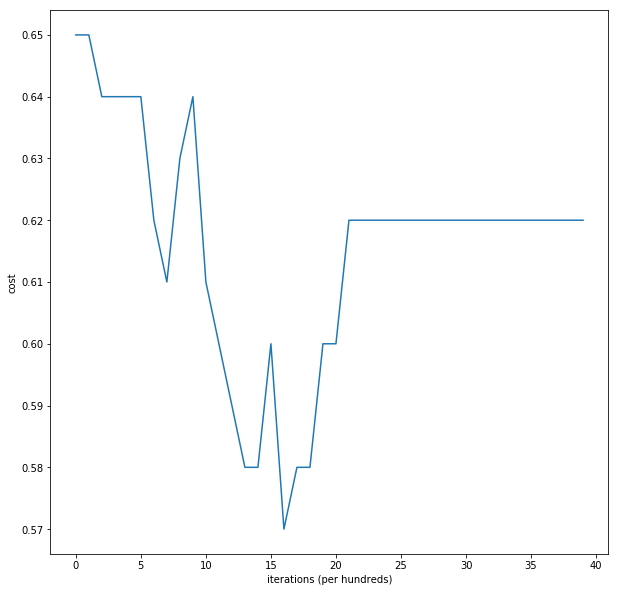

In [23]:
import matplotlib.pyplot as plt
costs = np.squeeze(accuracy)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
#plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
est=[];
for i in range(40):
    clf = RandomForestClassifier(n_estimators=i+1,max_depth=2, random_state=0)
    clf.fit(X_tr, df001['labels'])
    pred=clf.predict(X_te)
    est.append(metrics.accuracy_score(pred,te001['labels']))


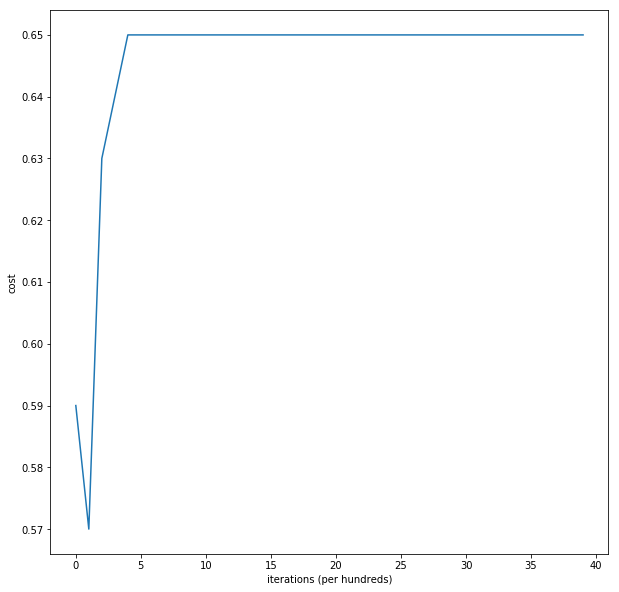

In [25]:
costs = np.squeeze(est)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
#plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [26]:
clf = DecisionTreeClassifier(random_state=0,min_samples_split=2)
clf.fit(X_tr, df001['labels'])
pred=clf.predict(X_te)
print("Accuracy: ",metrics.accuracy_score(pred,te001['labels']))

NameError: name 'DecisionTreeClassifier' is not defined

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=[]
for  i in range(40):
    clf = DecisionTreeClassifier(random_state=0,min_samples_split=i+2)
    clf.fit(X_tr, df001['labels'])
    pred=clf.predict(X_te)
    dt.append(metrics.accuracy_score(pred,te001['labels']))
    print("Accuracy: ",metrics.accuracy_score(pred,te001['labels']))


Accuracy:  0.41
Accuracy:  0.39
Accuracy:  0.41
Accuracy:  0.37
Accuracy:  0.39
Accuracy:  0.42
Accuracy:  0.42
Accuracy:  0.38
Accuracy:  0.38
Accuracy:  0.43
Accuracy:  0.43
Accuracy:  0.43
Accuracy:  0.4
Accuracy:  0.41
Accuracy:  0.43
Accuracy:  0.43
Accuracy:  0.41
Accuracy:  0.41
Accuracy:  0.41
Accuracy:  0.42
Accuracy:  0.42
Accuracy:  0.42
Accuracy:  0.4
Accuracy:  0.42
Accuracy:  0.43
Accuracy:  0.42
Accuracy:  0.46
Accuracy:  0.46
Accuracy:  0.46
Accuracy:  0.46
Accuracy:  0.46
Accuracy:  0.46
Accuracy:  0.46
Accuracy:  0.46
Accuracy:  0.45
Accuracy:  0.44
Accuracy:  0.44
Accuracy:  0.47
Accuracy:  0.47
Accuracy:  0.47


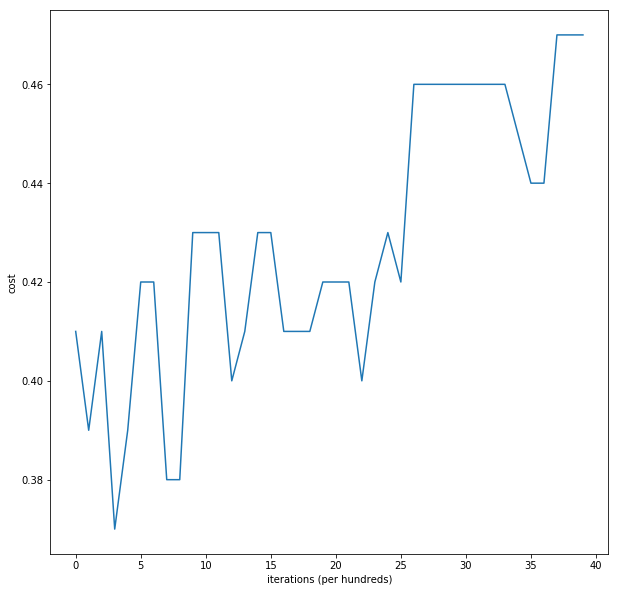

In [28]:
costs = np.squeeze(dt)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
#plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_tr, df001['labels']) 
pred=neigh.predict(X_te)
print("Accuracy: ",metrics.accuracy_score(pred,te001['labels']))

Accuracy:  0.6


In [30]:
neigh = KNeighborsClassifier(n_neighbors=27,weights='distance')
neigh.fit(X_tr, df001['labels']) 
pred=neigh.predict(X_te)
print("Accuracy: ",metrics.accuracy_score(pred,te001['labels']))

Accuracy:  0.64


In [31]:
knn=[]
for i in range(100):
    neigh = KNeighborsClassifier(n_neighbors=i+1)
    neigh.fit(X_tr, df001['labels']) 
    pred=neigh.predict(X_te)
    p=metrics.accuracy_score(pred,te001['labels'])
    knn.append(p)
    print("Accuracy: ",p)

Accuracy:  0.45
Accuracy:  0.57
Accuracy:  0.6
Accuracy:  0.6
Accuracy:  0.59
Accuracy:  0.6
Accuracy:  0.6
Accuracy:  0.6
Accuracy:  0.61
Accuracy:  0.63
Accuracy:  0.6
Accuracy:  0.59
Accuracy:  0.6
Accuracy:  0.61
Accuracy:  0.62
Accuracy:  0.61
Accuracy:  0.61
Accuracy:  0.63
Accuracy:  0.63
Accuracy:  0.63
Accuracy:  0.64
Accuracy:  0.63
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.64
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65
Accuracy:  0.65

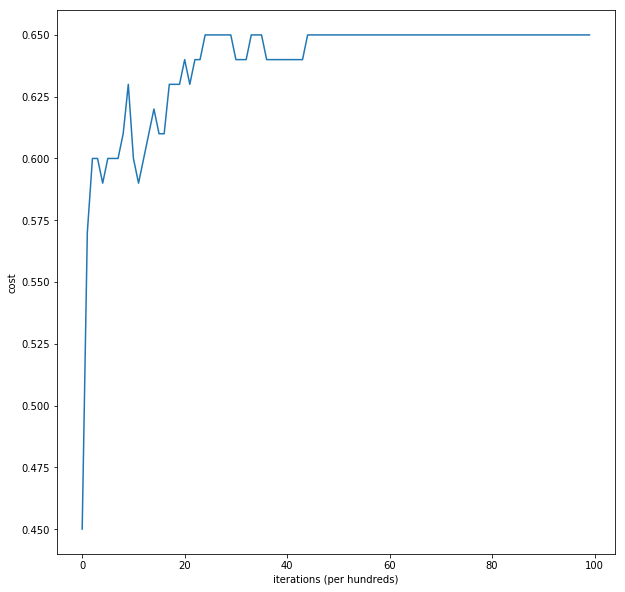

In [32]:
costs = np.squeeze(knn)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
#plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [ ]:
from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

from sklearn.metrics import log_loss

train=
test=

from scipy.misc import imresize

train_img=[]
for i in range(len(train)):

    temp_img=df001.images[i]

    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)

train_img=np.array(train_img)
train_img=preprocess_input(train_img)

test_img=[]
for i in range(len(test)):

    temp_img=te001.images[i]

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)

test_img=np.array(test_img)
test_img=preprocess_input(test_img)

from keras.models import Model

def vgg16_model(img_rows, img_cols, channel=1, num_classes=None):

    model = VGG16(weights='imagenet', include_top=True)

    model.layers.pop()

    model.outputs = [model.layers[-1].output]

    model.layers[-1].outbound_nodes = []

    x=Dense(num_classes, activation='softmax')(model.output)

    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

    for layer in model.layers[:8]:
        layer.trainable = False

# Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

train_y=np.asarray(train['labels'])

le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.2, random_state=42)

# Example to fine-tune on 3000 samples from Cifar10

img_rows, img_cols = 64,64 # Resolution of inputs
channel = 3
num_classes = 15
batch_size = 16
nb_epoch = 10

# Load our model
model = vgg16_model(img_rows, img_cols, channel, num_classes)

model.summary()
# Start Fine-tuning
model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))

# Make predictions
predictions_valid = model.predict(X_valid, batch_size=batch_size, verbose=1)

# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)

 

In [ ]:
!pip3 install cnn_utils

In [33]:
# CONVOLUTIONAL NEURAL NETWORK START
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt
import cv2
from scipy.misc import imresize
from scipy.misc import imread
from keras.preprocessing import image
from keras.preprocessing import image
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.cross_validation import train_test_split


/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
#PATH = os.path.abspath(os.path.join('..', 'input'))
#SOURCE_IMAGES001 = os.path.join(PATH, "images_001", "images")
images001 = glob(os.path.join("/home/akshay/Documents/images_001/images/", "*.png"))
%matplotlib inline
image_name = "/home/akshay/Documents/images_001/images/00000586_000.png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
p=[]
labels = pd.read_csv('/home/akshay/Documents/Data_Entry_2017.csv')

df=pd.DataFrame(labels)
def proc_images(folder):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    NoFinding = "No Finding"
    Consolidation="Consolidation"
    Infiltration="Infiltration"
    Pneumothorax="Pneumothorax"
    Edema="Edema"
    Emphysema="Emphysema"
    Fibrosis="Fibrosis"
    Effusion="Effusion"
    Pneumonia="Pneumonia"
    Pleural_Thickening="Pleural_Thickening"
    Cardiomegaly="Cardiomegaly"
    NoduleMass="Nodule"
    Hernia="Hernia"
    Atelectasis="Atelectasis"
    RareClass=["Emphysema","Edema","Fibrosis","Pneumonia","Hernia"]
    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 227
    HEIGHT = 227

    for img in folder:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]

        # Read and resize image
        full_size_image = cv2.imread(img)
        #full_size_image=cv2.cvtColor(full_size_image,cv2.COLOR_RGB2GRAY)
        #image=Image.open(img)
        #p.append(image.mode)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

        # Labels
        if NoFinding in finding:
            finding = 0
            y.append(finding)        
        elif Consolidation in finding:
            finding = 1
            y.append(finding)    
        elif Infiltration in finding:
            finding = 2
            y.append(finding)           
        elif Pneumothorax in finding:
            finding = 3
            y.append(finding)
        elif Edema in finding:
            finding = 9##
            y.append(finding)
        elif Emphysema in finding:
            finding = 9##
            y.append(finding)
        elif Fibrosis in finding:
            finding = 9##
            y.append(finding) 
        elif Effusion in finding:
            finding = 4
            y.append(finding)             
        elif Pneumonia in finding:
            finding = 9##
            y.append(finding)   
        elif Pleural_Thickening in finding:
            finding = 5
            y.append(finding) 
        elif Cardiomegaly in finding:
            finding = 6
            y.append(finding) 
        elif NoduleMass in finding:
            finding = 7
            y.append(finding) 
        elif Hernia in finding:
            finding = 9##
            y.append(finding) 
        elif Atelectasis in finding:
            finding = 8
            y.append(finding) 

        else:
            finding = 9
            y.append(finding)

    return x,y
# use for loop and dictionary

In [76]:
imgdata=images001[200:700]+images001[2000:2100]


In [77]:
data,label  =proc_images(imgdata)
#set(p)

In [78]:
df=pd.DataFrame()
df["images"]=data
df["labels"]=label
repo=[]
print(len(df), df.images[0].shape)
len(df["labels"])

df['images'][0]
df['images']=np.array(df['images'])
df['labels']=np.array(df['labels'])

X_train=df.images
for i in range(len(df.images)):

    temp_img=X_train[i]

    temp_img=image.img_to_array(temp_img)
    temp_img/=255

    repo.append(temp_img)

#converting train images to array and applying mean subtraction processing

repo=np.array(repo)
print(repo.shape)



600 (227, 227, 3)
(600, 227, 227, 3)


In [46]:
df['labels'].shape

(110,)

In [60]:
repo.shape

(110, 227, 227, 3)

In [61]:
X_train=repo[:100]

X_test=repo[100:]
label=np.reshape(label,(110,1))


In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

data=label
values = np.array(data)
#print(values)
#print("Inter----------------------------------------")
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
#print("onehot----------------------------------------")
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded.shape)
label=onehot_encoded
# invert first example
#Y_tr = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
#print(Y_tr)

(110, 10)


/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
Y_train=label[:100]
Y_test=label[100:]
print(np.shape(X_train),np.shape(X_test))
print(np.shape(Y_train),np.shape(Y_test))

(100, 227, 227, 3) (10, 227, 227, 3)
(100, 10) (10, 10)


In [ ]:
print(np.shape(df001['labels']),np.shape(te001['labels']))

In [ ]:
Y_tr=np.reshape(df001['labels'],(100,1))
Y_te=np.reshape(te001['labels'],(200,1))

In [ ]:
print(Y_tr.shape)

In [ ]:
len(set(df001['labels']))

In [ ]:
Y_tr = tf.one_hot(Y_tr, 15)
#Y_te=convert_to_one_hot(Y_te, 15).T

In [ ]:
Y_tr
with tf.Session() as sess:
    sess.run(Y_tr)

In [ ]:
print(np.shape(Y_tr),np.shape(Y_te))

In [64]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)
    ### END CODE HERE ###
    
    return X_pad

In [65]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Element-wise product between a_slice and W. Add bias.
    s = np.multiply(a_slice_prev, W) + b
    # Sum over all entries of the volume s
    Z = np.sum(s)
    ### END CODE HERE ###

    return Z

In [66]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape

    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                                 # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]                     # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[...,c], b[...,c])
                                        
    ### END CODE HERE ###

    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [67]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### START CODE HERE ###
    for i in range(m):                           # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    ### END CODE HERE ###
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [68]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])
    ### END CODE HERE ###
    
    return X, Y

In [69]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    #W1 = tf.get_variable("W1", [4, 4, 1, 8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    #W2 = tf.get_variable("W2", [2, 2, 8, 8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W1 = tf.get_variable("W1", [ 11, 11, 3, 96], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [5,5,96,256], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W3 = tf.get_variable("W3", [3,3,256,384], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W4 = tf.get_variable("W4", [3,3,384,384], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W5 = tf.get_variable("W5", [3,3,384,256], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    
    ### END CODE HERE ###
    print(W1.shape,W2.shape)
    parameters = {"W1": W1,
                  "W2": W2,
                 "W3": W3,
                  "W4": W4,
                 "W5":W5}
    
    return parameters

In [70]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    
    print("X ",X.shape)

    
    ### START CODE HERE ###
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 4, 4, 1], padding='VALID')
    print("Z1 ",Z1.shape)
    # RELU
    A1 = tf.nn.relu(Z1)
    print("A1 ",A1.shape)
   # A1 = tf.nn.dropout(A1,0.5 )

    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1, 3, 3, 1], strides = [1, 2, 2, 1], padding='VALID')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    print("P1 ",P1.shape)

    Z2 = tf.nn.conv2d(P1, W2, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    print("A2 ",A2.shape)

    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1, 3, 3, 1], strides = [1, 2, 2, 1], padding='VALID')
    print("P2 ",P2.shape)
    
    #################
    Z3 = tf.nn.conv2d(P2, W3, strides=[1, 1, 1, 1], padding='SAME')
    print("Z3 ",Z3.shape)
    # RELU
    A3 = tf.nn.relu(Z3)
    print("A3 ",A3.shape)
   # A1 = tf.nn.dropout(A1,0.5 )
    Z4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')
    print("Z4 ",Z4.shape)
    # RELU
    A4 = tf.nn.relu(Z4)
    Z5 = tf.nn.conv2d(A4, W5, strides=[1, 1, 1, 1], padding='SAME')
    print("Z5 ",Z5.shape)
    # RELU
    A5 = tf.nn.relu(Z5)

    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P3 = tf.nn.max_pool(A5, ksize = [1, 3, 3, 1], strides = [1, 2, 2, 1], padding='VALID')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    print("P3 ",P3.shape)

    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    
    ##########################
    
    
    
    # FLATTEN
    P = tf.contrib.layers.flatten(P3)
    print("P ",P.shape)

    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P, 10, activation_fn=None)
    print("Z3 ",Z3.shape)
   # print(Z3[1])

    ### END CODE HERE ###

    return Z3

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = " + str(a))

In [71]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))
    ### END CODE HERE ###
    
    return cost

In [72]:
def model(X_train, Y_train, X_test, Y_test, learning_rate=0.009,
          num_epochs=100, minibatch_size=64, print_cost=True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]    
    print(n_y)
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    #X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    X,Y=create_placeholders(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
        ### END CODE HERE ###
    p_tr=[]
    p_te=[]
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            #num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            #seed = seed + 1
            minibatches = (X_train,Y_train)
            #print(Y_train.shape)
            

            
                # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatches
            #print(minibatch_X.shape, minibatch_Y.shape)
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                ### END CODE HERE ###
                
            minibatch_cost += temp_cost 
                

            # Print the cost every epoch
            if print_cost == True and epoch % 10 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
            if print_cost== True and epoch % 20 ==0:
                predict_op = tf.argmax(Z3, 1)
                #print("Accur",sess.run(tf.metrics.accuracy(tf.argmax(Y, 1),predict_op)))
                correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
                print(correct_prediction)
                # Calculate accuracy on the test set
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                print(accuracy)
                train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
                test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
                print("Train Accuracy:", train_accuracy)
                print("Test Accuracy:", test_accuracy)
                p_tr.append(train_accuracy)
                p_te.append(test_accuracy)
                

        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        plt.plot(np.squeeze(p_tr))
        plt.ylabel('Training Accuracy')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        
        plt.plot(np.squeeze(p_te))
        plt.ylabel('Testing Accuracy')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        #print(Z3)
        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        print(correct_prediction)
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return predict_op,train_accuracy, test_accuracy, parameters

In [ ]:
per,_, _, parameters = model(X_train, Y_train, X_test, Y_test)


In [ ]:
per,_, _, parameters = model(X_train, Y_train, X_test, Y_test,num_epochs=150)


In [ ]:
per,_, _, parameters = model(X_train, Y_train, X_test, Y_test,num_epochs=150,learning_rate=0.001)


In [ ]:
per,_, _, parameters = model(X_train, Y_train, X_test, Y_test,num_epochs=150,learning_rate=0.027)


In [ ]:
!pip3 install dask --upgrade

In [ ]:
per,_, _, parameters = model(X_train, Y_train, X_test, Y_test)


In [ ]:
>>> import cv2
>>> flags = [i for i in dir(cv2) if i.startswith('COLOR_BGR')]
>>> print(flags)

In [73]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[0]                  # number of training examples
    mini_batches = []
        
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = X[k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = Y[k * mini_batch_size:(k + 1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = X[num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = Y[num_complete_minibatches * mini_batch_size:]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [ ]:
random_mini_batches(X_train, Y_train, minibatch_size, seed)

In [74]:
def model2(X_train, Y_train, X_test, Y_test, learning_rate=0.009,
          num_epochs=100, minibatch_size=64, print_cost=True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
              #  print(minibatch_X.shape)
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 1 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

(11, 11, 3, 96) (5, 5, 96, 256)
X  (?, 227, 227, 3)
Z1  (?, 55, 55, 96)
A1  (?, 55, 55, 96)
P1  (?, 27, 27, 96)
A2  (?, 27, 27, 256)
P2  (?, 13, 13, 256)
Z3  (?, 13, 13, 384)
A3  (?, 13, 13, 384)
Z4  (?, 13, 13, 384)
Z5  (?, 13, 13, 256)
P3  (?, 6, 6, 256)
P  (?, 9216)
Z3  (?, 10)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Cost after epoch 0: 4.819993
Cost after epoch 1: 4.420518
Cost after epoch 2: 3.867804
Cost after epoch 3: 3.565708
Cost after epoch 4: 3.688980


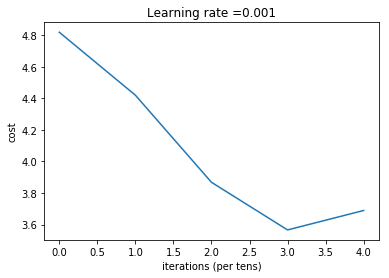

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.58
Test Accuracy: 0.4


In [75]:
_, _, parameters = model2(X_train, Y_train, X_test, Y_test,num_epochs=5,learning_rate=0.009)

In [2]:
import tensorflow.contrib.slim as slim; eval = slim.evaluation.evaluate_once

/home/akshay/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:

import tensorflow as tf
slim= tf.contrib.slim
